In [1]:
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine, text
from sqlalchemy import URL
from sqlalchemy import create_engine

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
def create_table(username, password,db_name):
    url_object = URL.create(
        "mysql+mysqlconnector",
        username=username,
        password=password,
        host="localhost",
        database=db_name
    )
    return create_engine(url_object)

In [3]:
engine = create_table('root', 'Farideh@2376', 'SuperStore')

In [4]:
query = """
SELECT Sales, Quantity,  discount, Profit, `Shipping Cost`,`Product Name`, p.Category, p.`Sub-Category`,Market, `Ship Mode`,Segment, COALESCE(returned, 0) AS returned
FROM order_detail
JOIN product p ON order_detail.`Product ID` = p.`Product ID`
JOIN shipping s ON order_detail.`Order ID` = s.`Order ID`
JOIN `order` o ON o.`Order ID` = order_detail.`Order ID`
JOIN customer c ON o.`Customer ID` = c.`Customer ID`
LEFT JOIN returned r ON order_detail.`Order ID` = r.`Order ID`
"""


df=pd.DataFrame(engine.connect().execute(text(query)))

In [5]:
df

,Sales,Quantity,discount,Profit,Shipping Cost,Product Name,Category,Sub-Category,Market,Ship Mode,Segment,returned
0,673.568,2,0.200,252.5880,54.960,GBC DocuBind 200 Manual Binding Machine,Office Supplies,Binders,US,Standard Class,Consumer,0
1,52.980,2,0.000,14.8344,3.170,Fellowes Advanced Computer Series Surge Protec...,Office Supplies,Appliances,US,Standard Class,Consumer,0
2,14.940,3,0.000,7.0218,0.990,Staples,Office Supplies,Paper,US,Standard Class,Consumer,0
3,14.560,2,0.000,6.2608,1.310,"Master Caster Door Stop, Large Neon Orange",Furniture,Furnishings,US,Standard Class,Consumer,0
4,26.960,2,0.000,7.0096,5.230,Tenex Personal Project File with Scoop Front D...,Office Supplies,Storage,US,First Class,Consumer,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49665,1127.810,3,0.200,-126.8820,72.710,"Office Star Executive Leather Armchair, Adjust...",Furniture,Chairs,EU,Standard Class,Consumer,0
49666,87.984,2,0.400,7.3040,9.110,"Tenex Frame, Black",Furniture,Furnishings,LATAM,Standard Class,Consumer,1
49667,872.320,2,0.000,8.7200,68.222,"Cisco Smart Phone, with Caller ID",Technology,Phones,LATAM,Second Class,Consumer,0
49668,590.117,3,0.002,69.7374,106.680,"Sharp Fax Machine, Laser",Technology,Copiers,LATAM,Second Class,Consumer,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49670 entries, 0 to 49669
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          49670 non-null  float64
 1   Quantity       49670 non-null  int64  
 2   discount       49670 non-null  float64
 3   Profit         49670 non-null  float64
 4   Shipping Cost  49670 non-null  float64
 5   Product Name   49670 non-null  object 
 6   Category       49670 non-null  object 
 7   Sub-Category   49670 non-null  object 
 8   Market         49670 non-null  object 
 9   Ship Mode      49670 non-null  object 
 10  Segment        49670 non-null  object 
 11  returned       49670 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 4.5+ MB


In [7]:
X = df.drop(["Profit"],axis=1)
y = df['Profit']


In [8]:
from sklearn.model_selection import train_test_split

# Splitting data into train, validation and test sets with ratio of 80:10:10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
# check the shape of X_train and X_test and X_val

X_train.shape, X_test.shape ,X_val.shape

((39736, 11), (4967, 11), (4967, 11))

In [10]:
import category_encoders as ce

#X_Train encoders
encoder = ce.BaseNEncoder(cols=['Category','Market','Product Name','Ship Mode','Sub-Category','Segment'], base=3)
X_train = encoder.fit_transform(X_train)
X_train.head(10)


#X_val encoders
X_val= encoder.transform(X_val)


#X_test encoders
X_test= encoder.transform(X_test)
X_test.head(10)


,Sales,Quantity,discount,Shipping Cost,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,...,Sub-Category_0,Sub-Category_1,Sub-Category_2,Market_0,Market_1,Ship Mode_0,Ship Mode_1,Segment_0,Segment_1,returned
14598,366.744,4,0.30,73.320,1,0,2,2,2,2,...,1,0,2,1,0,0,2,1,0,0
28773,16.140,1,0.00,3.170,0,0,1,1,2,2,...,1,2,1,1,2,1,0,0,1,0
35357,134.983,3,0.17,13.900,1,1,0,0,2,1,...,1,1,2,1,1,0,2,1,0,0
22528,31.104,6,0.20,4.870,1,1,1,2,1,0,...,0,1,0,1,0,0,1,0,1,0
6684,225.568,2,0.20,47.180,0,0,0,2,2,1,...,1,0,2,1,0,0,2,0,1,0
48861,37.980,2,0.00,16.890,1,0,1,0,2,2,...,0,0,2,1,1,1,0,0,2,0
35419,39.640,2,0.00,5.867,1,0,0,1,0,0,...,0,1,0,0,2,0,2,1,0,0
34656,200.250,5,0.00,6.210,0,2,0,2,0,1,...,1,2,1,1,1,1,0,0,1,0
30751,73.425,5,0.50,8.760,0,0,2,0,0,0,...,0,2,0,1,1,0,2,0,1,0
39762,35.040,5,0.40,3.823,0,0,1,0,0,1,...,0,2,2,0,2,0,2,0,1,0


In [11]:
# check the shape of X_train and X_test and X_val

X_train.shape, X_test.shape ,X_val.shape,y_val.shape
y_val

24410     11.0760
10500    -33.6800
25810     21.1200
46072    160.6720
14168     44.1600
           ...   
43113     20.3920
15521     22.9500
7128      15.6104
31502      2.8440
26923     47.6268
Name: Profit, Length: 4967, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler

columns_to_scale = [ 'Sales', 'Shipping Cost','Quantity']

#X_train scale
scaler = QuantileTransformer()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_train.head(5)

#X_val scale
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_val.head(5)

#X_test scale
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_train.head(5)


,Sales,Quantity,discount,Shipping Cost,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,...,Sub-Category_0,Sub-Category_1,Sub-Category_2,Market_0,Market_1,Ship Mode_0,Ship Mode_1,Segment_0,Segment_1,returned
28676,0.477906,0.679179,0.0,0.474308,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
39317,0.514441,0.303303,0.4,0.502903,0,0,0,0,0,0,...,0,0,2,0,2,0,2,0,1,0
15298,0.173814,0.303303,0.4,0.094019,0,0,0,0,0,0,...,0,1,0,0,2,0,2,0,2,0
23261,0.387605,0.867868,0.0,0.392543,0,0,0,0,0,0,...,0,1,1,0,2,0,1,0,1,0
20904,0.117117,0.524024,0.0,0.180180,0,0,0,0,0,0,...,0,1,2,1,0,0,2,0,1,0


In [13]:
y_train = pd.DataFrame(y_train, columns=['Profit'])

y_val = pd.DataFrame(y_val, columns=['Profit'])

y_test = pd.DataFrame(y_test, columns=['Profit'])

In [14]:
column_to_scale = ['Profit']

# y scale
scaler_y = QuantileTransformer()
y_train[column_to_scale] = scaler_y.fit_transform(y_train[column_to_scale].values.reshape(-1,1))
# use the same scaler to transform validation and test sets
y_val = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
y_test

array([0.04208333, 0.46129187, 0.75738425, ..., 0.93312428, 0.09178937,
       0.78571444])

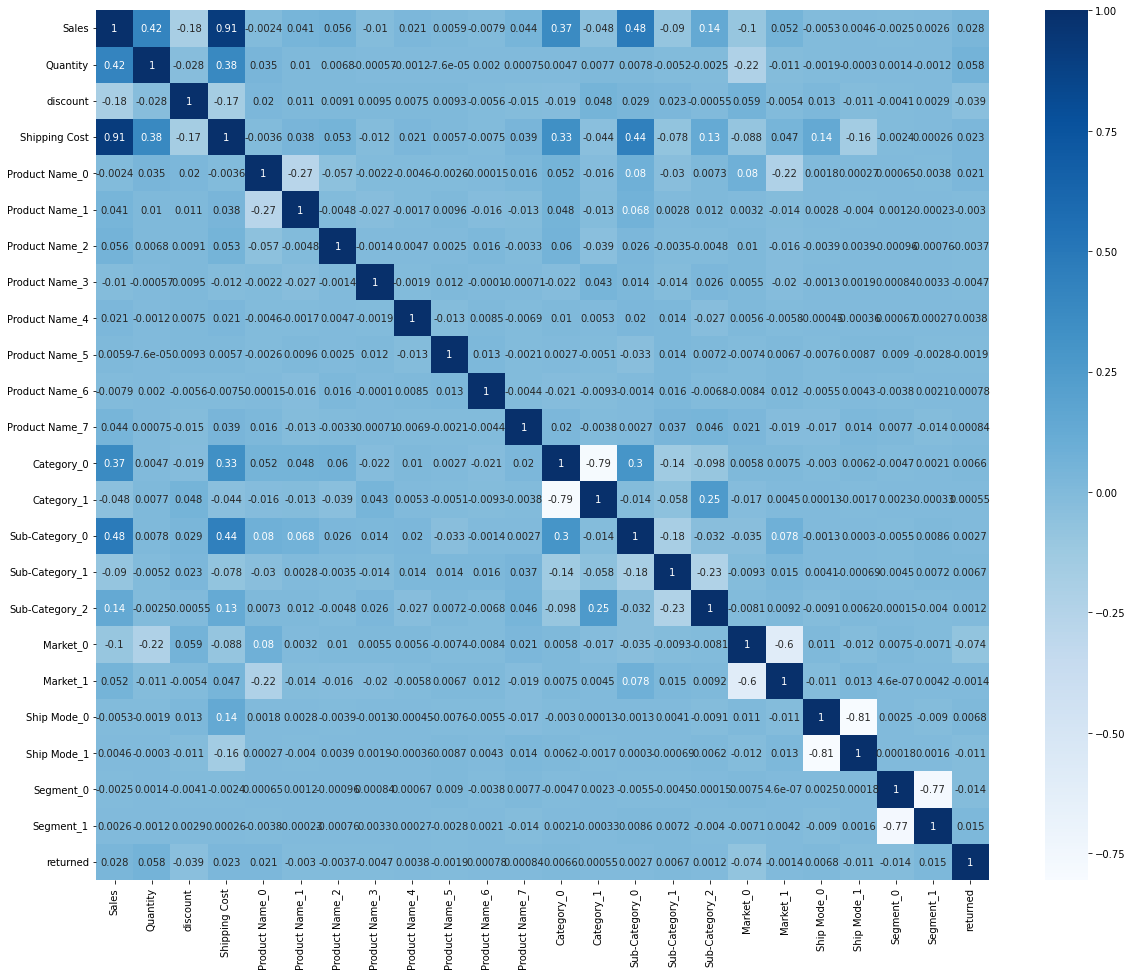

In [15]:
plt.figure(figsize=(20,16))
sns.heatmap(X_train.corr(),annot=True,cmap='Blues');

# XGBRegressor 

In [25]:
from xgboost import XGBRegressor 

model_xgb = XGBRegressor(n_estimators=100, max_depth=12 ,learning_rate=0.211)
model_xgb.fit(X_train, y_train)

# Finally, predict on val data
pred_val_xgb = model_xgb.predict(X_val)

r2_val_xgb = r2_score(y_val, pred_val_xgb).round(4)
mse_val_xgb = mean_squared_error(y_val, pred_val_xgb).round(4)
rmse_val_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb)).round(4)
mae_val_xgb = mean_absolute_error(y_val, pred_val_xgb).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_val_xgb)
print(f'\033[92m')
print('MSE       : ', mse_val_xgb)
print('RMSE      : ', rmse_val_xgb)
print('MAE       : ', mae_val_xgb)



R2 Score  :  0.75

MSE       :  0.0208
RMSE      :  0.1443
MAE       :  0.0914



# RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=30, max_features=50)
model_RandomForestRegressor.fit(X_train, y_train)

# Finally, predict on val data
pred_test_RandomForestRegressor = model_RandomForestRegressor.predict(X_val)

r2_test_RandomForestRegressor = r2_score(y_val, pred_test_RandomForestRegressor).round(4)
mse_test_RandomForestRegressor = mean_squared_error(y_val, pred_test_RandomForestRegressor).round(4)
rmse_test_RandomForestRegressor = np.sqrt(mean_squared_error(y_val, pred_test_RandomForestRegressor)).round(4)
mae_test_RandomForestRegressor = mean_absolute_error(y_val, pred_test_RandomForestRegressor).round(4)


print(f'\033[94m')
print('R2 Score : ', r2_test_RandomForestRegressor)
print(f'\033[92m')
print('MSE      : ', mse_test_RandomForestRegressor)
print('RMSE     : ', rmse_test_RandomForestRegressor)
print('MAE      : ', mae_test_RandomForestRegressor)


R2 Score :  0.727

MSE      :  0.0227
RMSE     :  0.1508
MAE      :  0.0995


# HistGradientBoostingRegressor

In [26]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_HistGradientBoostingRegressor = HistGradientBoostingRegressor()
model_HistGradientBoostingRegressor.fit(X_train, y_train)

# Finally, predict on val data
pred_test_HistGradientBoostingRegressor = model_HistGradientBoostingRegressor.predict(X_val)

r2_test_HistGradientBoostingRegressor = r2_score(y_val, pred_test_HistGradientBoostingRegressor).round(4)
mse_test_HistGradientBoostingRegressor = mean_squared_error(y_val, pred_test_HistGradientBoostingRegressor).round(4)
rmse_test_HistGradientBoostingRegressor = np.sqrt(mean_squared_error(y_val, pred_test_HistGradientBoostingRegressor)).round(4)
mae_test_HistGradientBoostingRegressor = mean_absolute_error(y_val, pred_test_HistGradientBoostingRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_HistGradientBoostingRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_HistGradientBoostingRegressor)
print('RMSE      : ', rmse_test_HistGradientBoostingRegressor)
print('MAE       : ', mae_test_HistGradientBoostingRegressor)


R2 Score  :  0.7263

MSE       :  0.0228
RMSE      :  0.151
MAE       :  0.1024




# ExtraTreesRegressor

In [27]:
from sklearn.ensemble import ExtraTreesRegressor

model_ExtraTreesRegressor = ExtraTreesRegressor(n_estimators=100,max_depth=30,min_samples_split=5, bootstrap=True)
model_ExtraTreesRegressor.fit(X_train, y_train)

# Finally, predict on val data
pred_test_ExtraTreesRegressor = model_ExtraTreesRegressor.predict(X_val)

r2_test_ExtraTreesRegressor = r2_score(y_val, pred_test_ExtraTreesRegressor).round(4)
mse_test_ExtraTreesRegressor = mean_squared_error(y_val, pred_test_ExtraTreesRegressor).round(4)
rmse_test_ExtraTreesRegressor = np.sqrt(mean_squared_error(y_val, pred_test_ExtraTreesRegressor)).round(4)
mae_test_ExtraTreesRegressor= mean_absolute_error(y_val, pred_test_ExtraTreesRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_ExtraTreesRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_ExtraTreesRegressor)
print('RMSE      : ', rmse_test_ExtraTreesRegressor)
print('MAE       : ', mae_test_ExtraTreesRegressor)


R2 Score  :  0.7484

MSE       :  0.021
RMSE      :  0.1448
MAE       :  0.0967


# AdaBoostRegressor

In [28]:
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoostRegressor = AdaBoostRegressor(n_estimators=50, learning_rate=0.1999,random_state=0)
model_AdaBoostRegressor.fit(X_train, y_train)

# Finally, predict on val data
pred_test_AdaBoostRegressor = model_AdaBoostRegressor.predict(X_val)

r2_test_AdaBoostRegressor = r2_score(y_val, pred_test_AdaBoostRegressor).round(4)
mse_test_AdaBoostRegressor = mean_squared_error(y_val, pred_test_AdaBoostRegressor).round(4)
rmse_test_AdaBoostRegressor = np.sqrt(mean_squared_error(y_val, pred_test_AdaBoostRegressor)).round(4)
mae_test_AdaBoostRegressor= mean_absolute_error(y_val, pred_test_AdaBoostRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_AdaBoostRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_AdaBoostRegressor)
print('RMSE      : ', rmse_test_AdaBoostRegressor)
print('MAE       : ', mae_test_AdaBoostRegressor)



R2 Score  :  0.6413

MSE       :  0.0299
RMSE      :  0.1729
MAE       :  0.1315


In [29]:
models = pd.DataFrame({
    
    'Model': [
        'XGBRegressor', 'RandomForestRegressor',
        'HistGradientBoostingRegressor', 'ExtraTreesRegressor',
        'AdaBoostRegressor'
    ],
    
    'R2 Score': [
        r2_val_xgb, r2_test_RandomForestRegressor,
        r2_test_HistGradientBoostingRegressor, r2_test_ExtraTreesRegressor,
        r2_test_AdaBoostRegressor
    
    ],
    
    'MSE': [
        mse_val_xgb, mse_test_RandomForestRegressor,
        mse_test_HistGradientBoostingRegressor, mse_test_ExtraTreesRegressor,
        mse_test_AdaBoostRegressor
    ],
    
    'RMSE': [
         rmse_val_xgb, rmse_test_RandomForestRegressor,
        rmse_test_HistGradientBoostingRegressor, rmse_test_ExtraTreesRegressor,
        rmse_test_AdaBoostRegressor
    ],
    
    'MAE': [
         mae_val_xgb, mae_test_RandomForestRegressor,
         mae_test_HistGradientBoostingRegressor, mae_test_ExtraTreesRegressor,
         mae_test_AdaBoostRegressor
    ]
    
})


In [30]:
models

,Model,R2 Score,MSE,RMSE,MAE
0,XGBRegressor,0.7500,0.0208,0.1443,0.0914
1,RandomForestRegressor,0.7270,0.0227,0.1508,0.0995
2,HistGradientBoostingRegressor,0.7263,0.0228,0.1510,0.1024
3,ExtraTreesRegressor,0.7484,0.0210,0.1448,0.0967
4,AdaBoostRegressor,0.6413,0.0299,0.1729,0.1315


In [31]:
models.sort_values(by='R2 Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,R2 Score,MSE,RMSE,MAE
XGBRegressor,0.750000,0.020800,0.144300,0.091400
ExtraTreesRegressor,0.748400,0.021000,0.144800,0.096700
RandomForestRegressor,0.727000,0.022700,0.150800,0.099500
HistGradientBoostingRegressor,0.726300,0.022800,0.151000,0.102400
AdaBoostRegressor,0.641300,0.029900,0.172900,0.131500


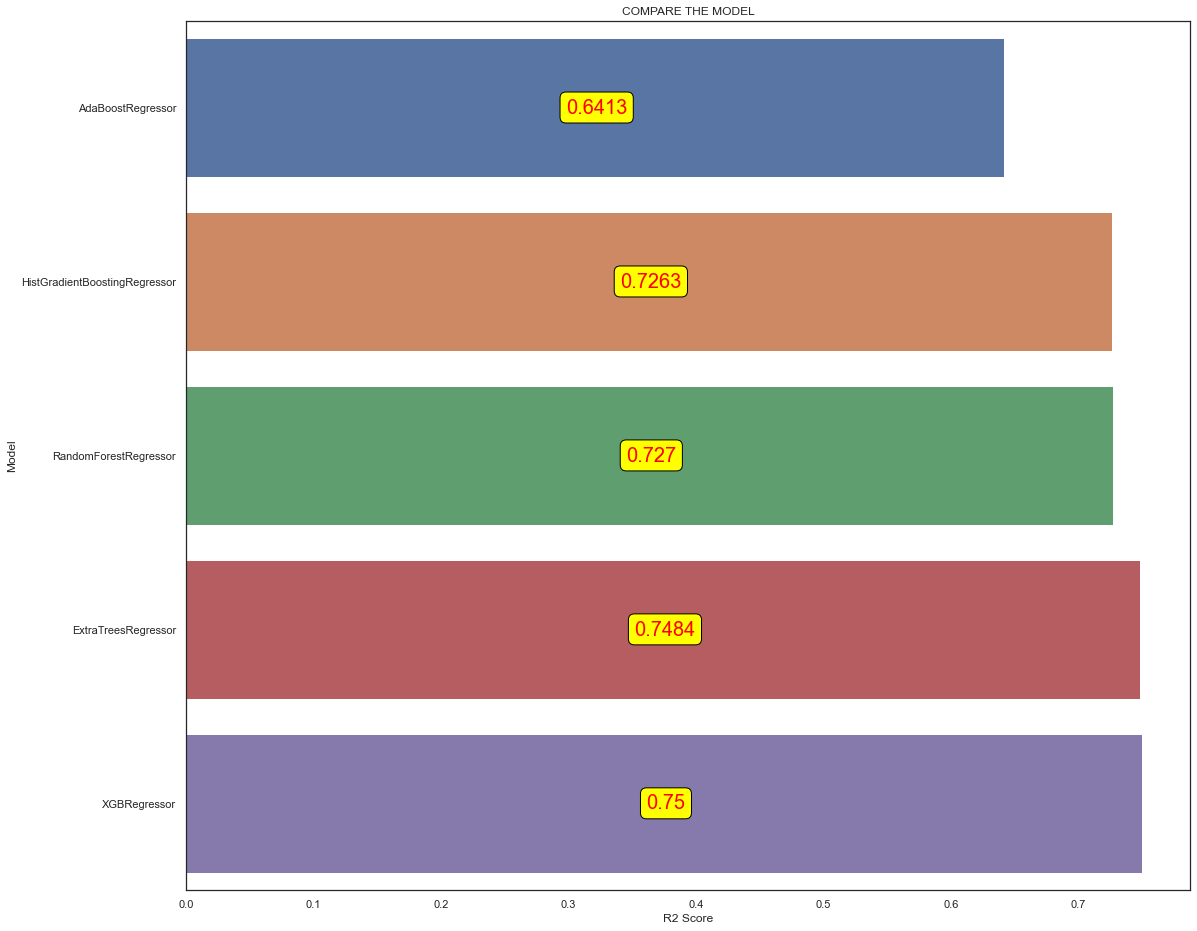

In [32]:
p = plt.figure(figsize=(18,16))

p = sns.set_theme(style="white")

p= models=models.sort_values(by='R2 Score',ascending=True)[:20]

p = sns.barplot(y= 'Model', x= 'R2 Score', data= models)

for container in p.containers:
    p.bar_label(container,label_type = 'center',padding = 2,size = 20,color = "Red",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "yellow", "edgecolor": "black", "alpha": 1})
plt.title('COMPARE THE MODEL')
plt.xlabel('R2 Score')
plt.ylabel('Model');

# Best Performing Model : XGBRegressor

In [33]:
print(f'\033[94m')
prediction =  model_xgb.predict(X_test)
prediction

array([0.10539562, 0.4396096 , 0.6145447 , ..., 0.6050628 , 0.42045745,
       0.67231756], dtype=float32)

In [36]:
cross_checking = pd.DataFrame({'Actual' : y_test, 'Predicted' : prediction.ravel()})
cross_checking.head()

,Actual,Predicted
0,0.042083,0.105396
1,0.461292,0.439610
2,0.757384,0.614545
3,0.533033,0.532728
4,0.339326,0.523898


In [37]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
0,0.042083,0.105396,-0.063312
1,0.461292,0.439610,0.021682
2,0.757384,0.614545,0.142840
3,0.533033,0.532728,0.000305
4,0.339326,0.523898,-0.184572


In [38]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(10).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
674,0.440440,0.553003,-0.112563
4782,0.837889,0.795069,0.042821
447,0.855208,0.701016,0.154192
3300,0.640480,0.900686,-0.260206
2871,0.048981,0.017493,0.031488
3513,0.133148,0.229368,-0.096220
832,0.843545,0.656812,0.186733
3125,0.589590,0.578983,0.010607
421,0.981941,0.896245,0.085696
1170,0.297341,0.152427,0.144914


In [40]:
sorted_models = models.sort_values(by='R2 Score', ascending=False)  #
cross_checking.to_csv('cross_checking.csv', index=False)